In [10]:
import scipy.io.wavfile as wavfile
import scipy.fftpack as fftpack
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

**Récupération de la Musique**

In [2]:
ChoixMusique = "3"

In [3]:
sound = AudioSegment.from_wav("./music/music"+str(ChoixMusique)+".wav") 
sound = sound.set_channels(1)   # mono channel only
sound.export("./music/music"+str(ChoixMusique)+"mono.wav", format="wav")    # Export mono file for further processing

<_io.BufferedRandom name='./music/music3mono.wav'>

**Partie Traitement**

In [4]:
s_rate, signal = wavfile.read("./music/music"+str(ChoixMusique)+"mono.wav") # read the wav file
temps = np.linspace(0,len(signal)*1/s_rate,len(signal))
print(np.max(signal))

32767


*Affichage du Signal Temporel*

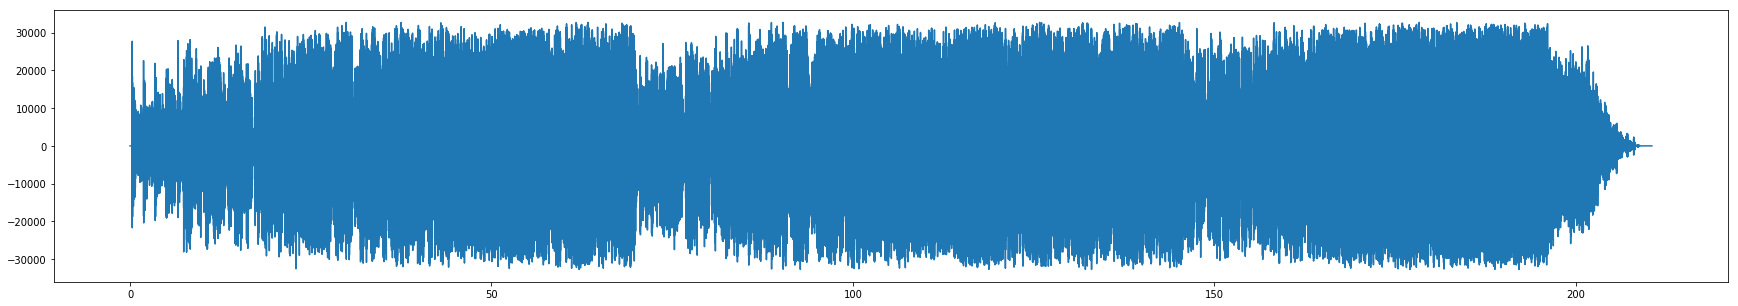

In [5]:
plt.figure(figsize=(30,5))
plt.plot(temps, signal)

*Affichage de la FFT*
(version FFTPACK)

In [6]:
FFT = abs(fftpack.fft(signal))
freq = fftpack.fftfreq(len(FFT), 1/s_rate)
# print(len(signal))

FFT1 = abs(fftpack.fft(signal, len(signal)))
freq1 = fftpack.fftfreq(len(FFT1), 1/s_rate)

FFT2 = abs(fftpack.fft(signal, int(len(signal)/2)))
freq2 = fftpack.fftfreq(len(FFT2), 1/s_rate)

Text(0, 0.5, 'Amplitude')

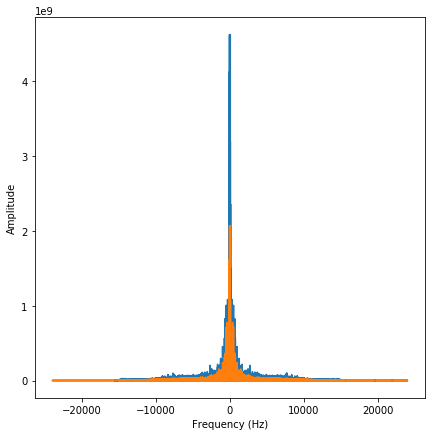

In [7]:
plt.figure(figsize=(7,7))
plt.plot(freq, FFT)
# plt.plot(freq1, FFT1)
plt.plot(freq2, FFT2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

*Normalisation des signaux*

In [8]:
# Normalisation du signal
FFT = FFT/np.amax(FFT)
FFT1 = FFT1/np.amax(FFT1)
FFT2 = FFT2/np.amax(FFT2)

Text(0, 0.5, 'Amplitude')

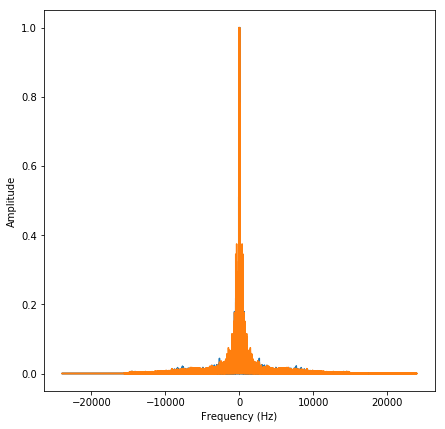

In [9]:
plt.figure(figsize=(7,7))
plt.plot(freq, FFT)
# plt.plot(freq1, FFT1)
plt.plot(freq2, FFT2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

***Test De Similarité***

In [18]:
s_rate1, signal1 = wavfile.read("./music/music1mono.wav")
s_rate2, signal2 = wavfile.read("./music/music2mono.wav")
s_rate3, signal3 = wavfile.read("./music/music3mono.wav")
print(len(signal1), len(signal2), len(signal3))

10581612 9754053 10104582


In [13]:
def diff_zero(signal):
    '''Permet de supprimer les zéros en début et fin de signal'''
    for i in range(len(signal)):
        if signal[i] != 0:
            ind1 = i
            break
    for i in range(len(signal)-1,0,-1):
        if signal[i] != 0:
            ind2 = i
            break
    return signal[ind1:ind2+1]

In [19]:
# échantillonnage
signal1 = signal1[::10]
signal2 = signal2[::10]
signal3 = signal3[::10]
print(len(signal1), len(signal2), len(signal3))

1058162 975406 1010459
